In [21]:
##### Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.special import factorial, comb
from scipy.special import gamma as gamma_func
from scipy.special import beta as beta_func
from scipy.stats import gamma, beta, binom
from fractions import Fraction


#### Ex 1.1 (Mackay Ex 2.10)

Urn A contains three balls: one black, and two white; urn B contains three balls: two black, and one white. One of the urns is selected at random and one ball is drawn. The ball is black. What is the probability that the selected urn is urn A?

#### Solution 1.1
To solve this, we use Bayes' Theorem. First, let's define our events:

- $U_A$: The event that Urn A was selected.
- $U_B$: The event that Urn B was selected.
- $B$: The event that a black ball was drawn.

The probability of choosing either urn A or B is 0.5 since the choice is random

$$P(U_A) = P(U_B) = \frac{1}{2}$$

The probability of drawing a black ball, given a specific urn are: $P(B | U_A) \;and\; P(B | U_B)$ 


Urn A has 1 black ball out of 3 total.
$$P(B | U_A)  = \frac{1}{3}$$
Urn B has 2 black balls out of 3 total.

$$P(B | U_B) = \frac{2}{3}$$

$\therefore$ The probability of choosing Urn A given that the selected ball is Black,
  
Using Bayes' Theorem :

$$P(U_A | B) = \frac{P(B | U_A) P(U_A)}{P(B|U_A)P(U_A) + P(B|U_B)P(U_B)}$$

$$ = \frac{\frac{1}{3}.\frac{1}{2}}{\frac{1}{3}.\frac{1}{2}+\frac{2}{3}.\frac{1}{2}}$$

$$ = \frac{\frac{1}{6}}{\frac{3}{6}} $$

$$\therefore (U_A | B) = \frac{1}{3}$$
  

#### Ex 1.2
Consider $11$ urns $u_{i}$, $i=0,...,10$, each with $10$ balls.
Urn $u_{i}$ has $i$ black balls and $10-i$ white balls. Select
one urn at random, and draw $N$ times with replacement from that
urn. Suppose that the outcome after $N=10$ draws is that the number
of black balls that have been drawn is even. What is the probability
that urn $u_{i}$ was selected?

#### Solution 1.2

We formally define the events and key probabilities:

- **Hypothesis, $U_i$**: The event that urn $u_i$ was selected, for $i \in \{0, 1, \dots, 10\}$.
- **Evidence, $E$**: The event that after $N=10$ draws, the number of black balls drawn is even.
- **Basic Outcome, $B$**: The event that a *single* ball drawn is black.
- **Prior Probability**: Since an urn is selected at random from 11 urns, the prior is uniform:
  $$
  P(U_i) = \frac{1}{11} \quad \forall i \in \{0, 1, \dots, 10\}
  $$
- **Conditional Probability of a Single Draw**: The probability of drawing a black ball from urn $u_i$ is:
  $$
  P(B | U_i) = \frac{i}{10}
  $$

Need to find the posterior probability, $P(U_i | E)$.

Using Bayes' Theorem:
$$P(U_i | E) = \frac{P(E | U_i) P(U_i)}{P(E)}$$

The prior probability for selecting any given urn is:
$$P(U_i) = \frac{1}{11}$$

For Likelihood i.e., $P(E|U_i)$ , let $K$ be the random variable for the number of black balls drawn in $N=10$ trials. This process follows a Binomial Distribution. The probability of drawing *exactly* $k$ black balls is given by the Binomial PMF, where the term $\binom{N}{k}$ counts the number of distinct sequences:
$$P(K=k | U_i) = \binom{N}{k} [P(B|U_i)]^k [1 - P(B|U_i)]^{N-k}$$
Our evidence $E$ is that $k$ is even. The likelihood is therefore the sum of these probabilities over all even values of $k$:
$$P(E | U_i) = \sum_{k \in \{0,2, \dots, 10\}} \binom{10}{k} [P(B|U_i)]^k [1 - P(B|U_i)]^{10-k}$$

Let $p = P(B|U_i) \text{        and       }q = 1 - P(B|U_i)$

The Binomial Theorem gives us the following identities:

$(q+p)^N = \sum_{k=0}^N \binom{N}{k} p^k q^{N-k}$

$(q-p)^N = \sum_{k=0}^N \binom{N}{k} (-p)^k q^{N-k}$

Adding these two,
$$
(q+p)^N + (q-p)^N = 2 \sum_{k \in \{0,2,4,\dots\}} \binom{N}{k} p^k q^{N-k}
$$

$$
\sum_{k \in \{0,2,4,\dots\}} \binom{N}{k} p^k q^{N-k} = \frac{(q+p)^N + (q-p)^N}{2}
$$

We now have our simplified formula. We can substitute our formal probability notations back in.
$$
P(E | U_i) = \frac{([1 - P(B|U_i)] + P(B|U_i))^N + ([1 - P(B|U_i)] - P(B|U_i))^N}{2}
$$


$$
P(E | U_i) = \frac{1^{10} + (1 - 2P(B|U_i))^{10}}{2} = \frac{1 + (1 - 2P(B|U_i))^{10}}{2}
$$
Finally, we substitute the known value $P(B|U_i) = i/10$:
$$
P(E | U_i) = \frac{1 + \left(1 - 2\left(\frac{i}{10}\right)\right)^{10}}{2} = \frac{1 + \left(1 - \frac{i}{5}\right)^{10}}{2}
$$

The marginal evidence $P(E)$ is the total probability of observing the evidence, found using the Law of Total Probability by summing over all possible urns:
$$P(E) = \sum_{j=0}^{10} P(E | U_j) P(U_j)$$
Since the prior $P(U_j) = \frac{1}{11}$ is a constant, we can factor it out:
$$P(E) = \frac{1}{11} \sum_{j=0}^{10} P(E | U_j) = \frac{1}{11} \sum_{j=0}^{10} \left[ \frac{1 + \left(1 - \frac{j}{5}\right)^{10}}{2} \right]$$


$ \therefore$ substituting all the components,
$$P(U_i | E) = \frac{P(E | U_i) P(U_i)}{P(E)} = \frac{\left[ \frac{1 + \left(1 - \frac{i}{5}\right)^{10}}{2} \right] \cdot \frac{1}{11}}{\frac{1}{11} \sum_{j=0}^{10} \left[ \frac{1 + \left(1 - \frac{j}{5}\right)^{10}}{2} \right]}$$

$\therefore$ the posterior probability:
$$P(U_i | E) = \frac{1 + \left(1 - \frac{i}{5}\right)^{10}}{\sum_{j=0}^{10} \left[ 1 + \left(1 - \frac{j}{5}\right)^{10} \right]}$$

Final Posterior Probability Distribution P(U_i|E)
    Urn Index (i)  P(Black Ball) p_i  \
0               0           0.000000   
1               1           0.100000   
2               2           0.200000   
3               3           0.300000   
4               4           0.400000   
5               5           0.500000   
6               6           0.600000   
7               7           0.700000   
8               8           0.800000   
9               9           0.900000   
10             10           1.000000   

    Numerator Term (proportional to likelihood)  Posterior P(U_i|E)  
0                                      2.000000            0.151205  
1                                      1.107374            0.083720  
2                                      1.006047            0.076060  
3                                      1.000105            0.075611  
4                                      1.000000            0.075603  
5                                      1.000000  

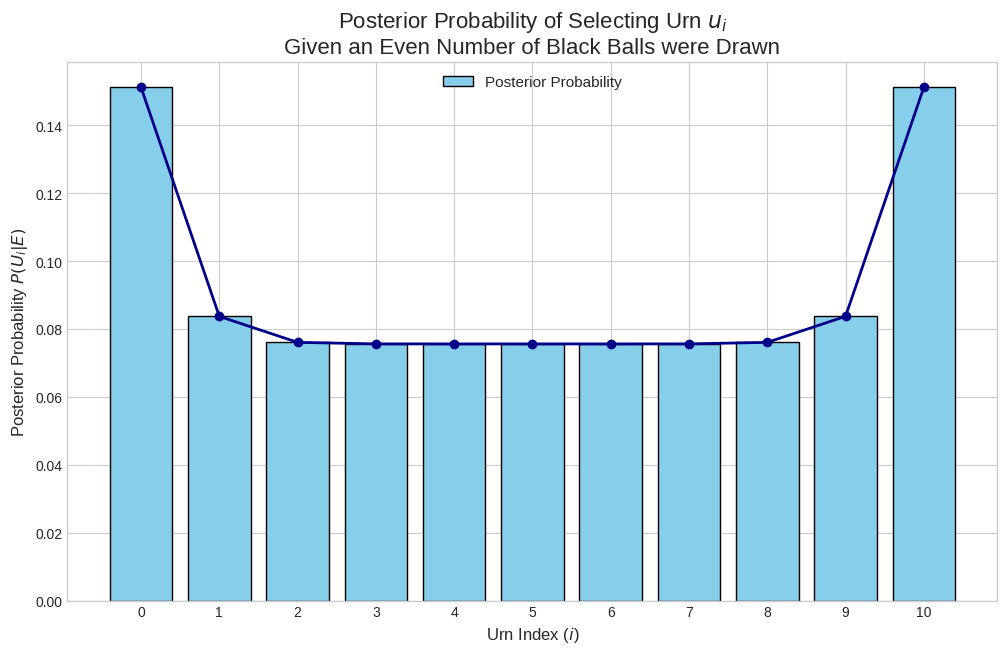

In [ ]:
# Urn indices from 0 to 10
urn_indices = np.arange(11)
N = 10            # number of draws

# Using the Final Formula we calculated above

# Calculate the numerator for each urn i. This term is proportional to the likelihood.
# Numerator = 1 + (1 - i/5)^10
likelihood_numerator = 1 + (1 - urn_indices / 5)**N

# Calculate the denominator, which is the sum of all numerator terms.
denominator = np.sum(likelihood_numerator)

posterior_probability = likelihood_numerator / denominator          # Probability that Urn U_i was selected given that the number of black balls drawn
                                                                    # was even after N draws


# Displaying the results in a table

# creating a pandas dataframe
results_df = pd.DataFrame({
    'Urn Index (i)': urn_indices,
    'P(Black Ball) p_i': urn_indices / 10,
    'Numerator Term (proportional to likelihood)': likelihood_numerator,
    'Posterior P(U_i|E)': posterior_probability
})

# Set display format for floating point numbers
pd.set_option('display.float_format', '{:.6f}'.format)

print("Final Posterior Probability Distribution P(U_i|E)")
print(results_df)
print(f"\nSum of all posterior probabilities: {np.sum(posterior_probability):.2f}")

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the posterior distribution as a bar chart
ax.bar(urn_indices, posterior_probability, color='skyblue', edgecolor='black', zorder=2, label='Posterior Probability')

# Overlay points and a line to emphasize the shape
ax.plot(urn_indices, posterior_probability, 'o-', color='darkblue', lw=2, zorder=3)

# Add labels, titles, and formatting
ax.set_title('Posterior Probability of Selecting Urn $u_i$\nGiven an Even Number of Black Balls were Drawn', fontsize=16)
ax.set_xlabel('Urn Index ($i$)', fontsize=12)
ax.set_ylabel('Posterior Probability $P(U_i|E)$', fontsize=12)
ax.set_xticks(urn_indices) # Ensure all urn indices are shown on the x-axis
ax.legend(fontsize=11)
ax.grid(True, zorder=0)

# Show the plot
plt.show()

#### Ex 1.3

Suppose we are told that data are drawn from an oracle that is a Gaussian
distribution with $\sigma=1$ and we believe that $\mu$ can have
any value with equal probability.
* The oracle produces one data point with value $x$. What can we infer
about $\mu$?
* The oracle produces a set of $N$ data points with values $x_{i},...,x_{N}$.
What can we infer about $\mu$ ? Hint: use the fact that the data
points are produced independently. What is the probability that the
data set is drawn from the oracle? Show that the result is Gaussian
in $\mu$ with mean $\bar{x}=\sum_{i=1}^{N}x_{i}$ and variance $\frac{1}{N}$.

1. If it is only known that $\sigma=1$ and there is only one data point with value $x$, then:
$$\mu \sim \mathcal{N}(x,1)$$

2. If the $N$ data points are given from $x_i$ to $x_N$, then $\mu$ can be updated as: 

    $$ \mu \sim \mathcal{N}(\bar{x},\frac{1}{N})$$ where $$\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i$$

    The probability density for a single observation in this case is: 

    $$p(x|\mu)=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}(x-\mu)^2}$$

    The total probability is: 

    $$p(x_1,x_2,...,x_N|\mu)=\prod_{i=1}^{N}p(x_i|\mu)=\prod_{i=1}^{N}\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}(x_i-\mu)^2}$$

    Since the prior is flat, the posterior is proportional to: 

    $$p(\mu|x_1, ... ,x_N) \propto e^{-\frac{1}{2}\sum_{i=1}^{N}(x_i-\mu)^2}$$

    The sum in the exponential can be expanded as: 

    $$\sum_{i=1}^{N}(x_i-\mu)^2 = \sum_{i=1}^{N}x_i^2 - 2\mu\sum_{i=1}^{N}x_i + N\mu^2$$

    The first term can be ignored since it does not depend on $\mu$. Thus, the proportionality can be rewritten as:

    $$p(\mu|x_1, ... ,x_N) \propto e^{-\frac{1}{2}(N\mu^2 - 2\mu\sum_{i=1}^{N}x_i)} = e^{-\frac{1}{2}(N\mu^2 - 2N\mu\bar{x})}$$

    Rearranging the inside of the exponential:

    $$-\frac{1}{2}(N\mu^2 - 2N\mu\bar{x}) = -\frac{1}{2}N(\mu^2 - 2\mu\bar{x}) = -\frac{1}{2}N((\mu^2 - 2\mu\bar{x}+\bar{x}^2)-\bar{x}^2)=-\frac{1}{2}N((\mu - \bar{x})^2 -\bar{x}^2)$$

    The proportionality becomes:

    $$p(\mu|x_1, ... ,x_N) \propto e^{-\frac{1}{2}N(\mu - \bar{x})^2} * e^{\frac{1}{2}N\bar{x}^2}$$

    The second exponential factor doesn't depend on $\mu$, so it is a constant, thus:

    $$p(\mu|x_1, ... ,x_N) \propto e^{-\frac{1}{2}N(\mu - \bar{x})^2}$$

    The above expression is exactly the Gaussian form $\mu \sim \mathcal{N}(\bar{x},\frac{1}{N})$.

#### Ex 1.4

Show that the $n$-dimensional multivariate Gaussian distribution
$$
p\left(x|\mu,\Sigma\right)=\frac{1}{\sqrt{\left(2\pi\right)^{n}\det\Sigma}}\exp\left[-\frac{1}{2}\left(x-\mu\right)^{T}\Sigma^{-1}\left(x-\mu\right)\right]
$$
is an exponential family distribution. In particular, the multivariate
Gaussian distribution is the a maximum entropy solution. What are
the constraints?